<a href="https://colab.research.google.com/github/FGalvao77/-DICAS-Uso-de-ferramentas-para-Data-Science-e-afins/blob/main/%5BDICAS%5D_RNA_com_TensorFlow_%26_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[DICAS] - `RNA` com _TensorFlow_ & _Keras_**
----
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 81)
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FGalvao77/datasets/main/housePrices_train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape, data.columns

((1460, 81),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
X = data.drop(['Id', 'SalePrice'], axis='columns')  # X = data.drop('SalePrice', axis=1) 
y = data['SalePrice']

In [6]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
Xtrain, Xval, yTrain, yVal = tts(
    X, y, train_size=0.5, random_state=0
)

In [9]:
Xtrain.shape, Xval.shape, yTrain.shape, yVal.shape

((730, 79), (730, 79), (730,), (730,))

In [10]:
Xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
733,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1961,1983,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,594,Unf,0,270,864,GasA,Ex,Y,SBrkr,1144,0,0,1144,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1961.0,RFn,1,264,TA,TA,Y,165,0,0,0,0,0,NaN,GdWo,Shed,400,3,2009,WD,Normal
382,60,RL,79.0,9245,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,939,939,GasA,Ex,Y,SBrkr,939,858,0,1797,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2006.0,RFn,2,639,TA,TA,Y,144,53,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
1232,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1224,0,0,1224,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2,462,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1354,60,RL,NaN,10316,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,735,Unf,0,257,992,GasA,Ex,Y,SBrkr,992,873,0,1865,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,RFn,3,839,TA,TA,Y,0,184,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
331,20,RL,70.0,8176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1992,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,846,Unf,0,210,1056,GasA,Fa,Y,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1958.0,RFn,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal


In [11]:
# cat_cols = X.select_dtypes('O')
cat_cols = X.select_dtypes('O').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 


In [13]:
from category_encoders import OneHotEncoder as ohe

In [14]:
cat_encoder = ohe(
    cols=cat_cols, drop_invariant=True
)

cat_encoder

OneHotEncoder(cols=Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'),
              drop_invariant=True)

In [15]:
Xtrain = cat_encoder.fit_transform(Xtrain)
Xval = cat_encoder.transform(Xval)

In [16]:
Xtrain.head()

,MSSubClass,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,LotFrontage,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,LotShape_3,LotShape_4,LandContour_1,LandContour_2,LandContour_3,LandContour_4,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_1,LandSlope_2,LandSlope_3,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,...,GarageCond_4,GarageCond_5,PavedDrive_1,PavedDrive_2,PavedDrive_3,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC_1,PoolQC_2,PoolQC_3,Fence_1,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,MiscVal,MoSold,YrSold,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
733,20,1,0,0,0,0,80.0,10000,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,165,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,400,3,2009,1,0,0,0,0,0,0,0,1,0,0,0,0,0
382,60,1,0,0,0,0,79.0,9245,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,144,53,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,4,2007,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1232,90,1,0,0,0,0,70.0,9842,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,3,2007,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1354,60,1,0,0,0,0,NaN,10316,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,184,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,6,2008,1,0,0,0,0,0,0,0,1,0,0,0,0,0
331,20,1,0,0,0,0,70.0,8176,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,8,2007,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer()

Xtrain = imputer.fit_transform(Xtrain)
Xval = imputer.transform(Xval)

In [19]:
Xtrain[:5]

array([[20.,  1.,  0., ...,  0.,  0.,  0.],
       [60.,  1.,  0., ...,  0.,  0.,  0.],
       [90.,  1.,  0., ...,  0.,  0.,  0.],
       [60.,  1.,  0., ...,  0.,  0.,  0.],
       [20.,  1.,  0., ...,  0.,  0.,  0.]])

In [20]:
pd.DataFrame(Xtrain).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284
0,20.0,1.0,0.0,0.0,0.0,0.0,80.000000,10000.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,400.0,3.0,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60.0,1.0,0.0,0.0,0.0,0.0,79.000000,9245.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,144.0,53.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,90.0,1.0,0.0,0.0,0.0,0.0,70.000000,9842.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,1.0,0.0,0.0,0.0,0.0,69.572635,10316.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,184.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20.0,1.0,0.0,0.0,0.0,0.0,70.000000,8176.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import MaxAbsScaler

In [22]:
scaler = MaxAbsScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)

In [23]:
Xtrain[:5]

array([[0.10526316, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31578947, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47368421, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31578947, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10526316, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
yTrain = yTrain.values 
yVal = yVal.values

In [25]:
yTrain[:5], yVal[:5]

(array([131400, 213500, 101800, 235000, 139000]),
 array([200624, 133000, 110000, 192000,  88000]))

In [26]:
import tensorflow as tf
tf.random.set_seed(2)

print(tf.__version__)

2.8.2


In [30]:
from tensorflow import keras as tfk
# from keras.layers import Input, Dense

In [31]:
input = tfk.layers.Input((Xtrain.shape[1], ))
hidden_layer1 = tfk.layers.Dense(100, activation='relu')(input)
output = tfk.layers.Dense(1, activation='linear')(hidden_layer1)

In [32]:
mdl_baseline = tfk.Model(input, output)

mdl_baseline.compile(loss='msle', optimizer='adam')

mdl_baseline.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 285)]             0         
                                                                 
 dense (Dense)               (None, 100)               28600     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 28,701
Trainable params: 28,701
Non-trainable params: 0
_________________________________________________________________


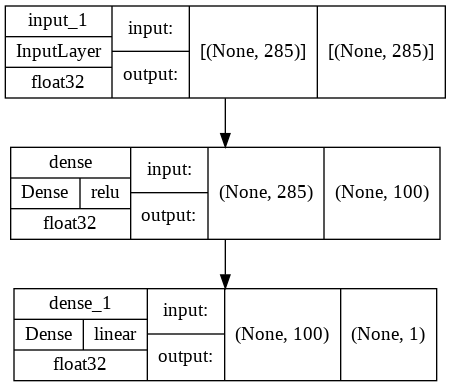

In [33]:
tf.keras.utils.plot_model(
    mdl_baseline,
    to_file='model_baseline.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [34]:
# from tensorflow.keras.utils import plot_model

In [35]:
# plot_model(mdl_baseline, show_shapes=True)
# keras.utils.plot_model(mdl_baseline, show_shapes=True)

In [36]:
mdl_baseline.fit(
    Xtrain, yTrain, validation_data=(Xval, yVal),
    epochs=1_000, shuffle=True, batch_size=32, verbose=0
)

In [37]:
preds = mdl_baseline.predict(Xval)

preds[:10]

array([[179287.23 ],
       [141978.34 ],
       [150012.95 ],
       [186160.83 ],
       [137363.83 ],
       [125870.086],
       [196567.61 ],
       [148842.75 ],
       [219446.06 ],
       [171618.45 ]], dtype=float32)

In [38]:
mdl_baseline.evaluate(Xval, yVal)

23/23 [==============================] - 0s 1ms/step - loss: 0.0683


0.068306565284729

In [39]:
from sklearn.metrics import mean_squared_log_error as msle

In [40]:
np.sqrt(msle(yVal, preds))

0.2613552939617471

In [42]:
tf.random.set_seed(2)

input = tfk.layers.Input((Xtrain.shape[1], ))

hidden_layer1 = tfk.layers.Dense(100, activation='relu')(input)
dropout_1 = tfk.layers.Dropout(0.5)(hidden_layer1)

hidden_layer2 = tfk.layers.Dense(18, activation='relu')(dropout_1)
dropout_3 = tfk.layers.Dropout(0.5)(hidden_layer2)

output = tfk.layers.Dense(1, activation='linear')(dropout_3)

mdl_2 = tfk.Model(input, output)

mdl_2.compile(loss='msle', optimizer='adam')

mdl_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 285)]             0         
                                                                 
 dense_5 (Dense)             (None, 100)               28600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 18)                1818      
                                                                 
 dropout_3 (Dropout)         (None, 18)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 30,437
Trainable params: 30,437
Non-trainable

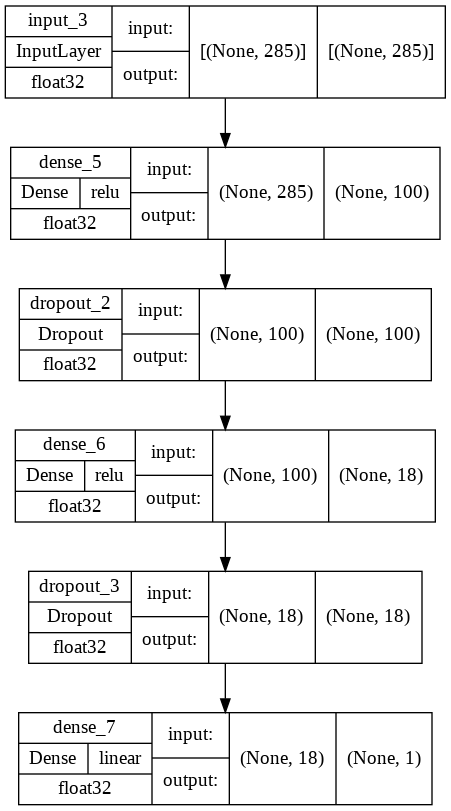

In [43]:
tf.keras.utils.plot_model(
    mdl_2,
    to_file='model_2.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [44]:
es = tfk.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, 
    mode='min', restore_best_weights=True
)

mdl_2.fit(
    Xtrain, yTrain, validation_data=(Xval, yVal),
    epochs=1_000, shuffle=True, batch_size=32, verbose=1,
    callbacks=[es]
)

Epoch 1/1000
23/23 [==============================] - 1s 11ms/step - loss: 126.7025 - val_loss: 107.5822
Epoch 2/1000
23/23 [==============================] - 0s 4ms/step - loss: 101.3055 - val_loss: 90.1344
Epoch 3/1000
23/23 [==============================] - 0s 4ms/step - loss: 87.8121 - val_loss: 79.2135
Epoch 4/1000
23/23 [==============================] - 0s 6ms/step - loss: 78.3782 - val_loss: 71.4511
Epoch 5/1000
23/23 [==============================] - 0s 6ms/step - loss: 71.3928 - val_loss: 65.5178
Epoch 6/1000
23/23 [==============================] - 0s 4ms/step - loss: 65.6062 - val_loss: 60.7800
Epoch 7/1000
23/23 [==============================] - 0s 7ms/step - loss: 61.9319 - val_loss: 56.9154
Epoch 8/1000
23/23 [==============================] - 0s 5ms/step - loss: 57.9548 - val_loss: 53.5829
Epoch 9/1000
23/23 [==============================] - 0s 4ms/step - loss: 54.0416 - val_loss: 50.5144
Epoch 10/1000
23/23 [==============================] - 0s 6ms/step - loss: 51.

In [45]:
mdl_2.evaluate(Xval, yVal)

23/23 [==============================] - 0s 2ms/step - loss: 0.0510


0.051028020679950714

In [46]:
preds2 = mdl_2.predict(Xval)

preds2[:10]

array([[207102.39],
       [145309.47],
       [159531.06],
       [213453.81],
       [133946.6 ],
       [118631.34],
       [235605.36],
       [157708.08],
       [276170.34],
       [192850.45]], dtype=float32)

In [47]:
np.sqrt(msle(yVal, preds2))

0.22589385027600783

In [51]:
tf.random.set_seed(2)

input = tfk.layers.Input((Xtrain.shape[1], ))

hidden_layer1 = tfk.layers.Dense(100, activation='relu')(input)
dropout_1 = tfk.layers.Dropout(0.5)(hidden_layer1)

hidden_layer2 = tfk.layers.Dense(50, activation='relu')(dropout_1)
dropout_2 = tfk.layers.Dropout(0.5)(hidden_layer2)

hidden_layer3 = tfk.layers.Dense(50, activation='relu')(dropout_2)
dropout_3 = tfk.layers.Dropout(0.5)(hidden_layer3)

output = tfk.layers.Dense(1, activation='linear')(dropout_3)

mdl_3 = tfk.Model(input, output)

mdl_3.compile(optimizer='adam', loss='msle', # loss: 'msle', 'mean_squared_error'
            #   metrics=['accuracy']
)

mdl_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 285)]             0         
                                                                 
 dense_12 (Dense)            (None, 100)               28600     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0   

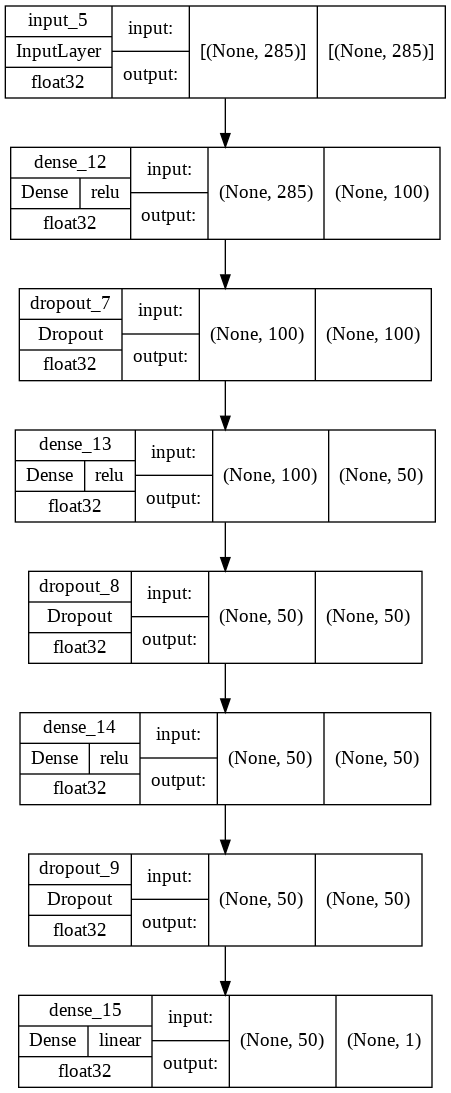

In [52]:
tf.keras.utils.plot_model(
    mdl_3,
    to_file='model_3.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [53]:
es = tfk.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, 
    mode='min', restore_best_weights=True
)

history = mdl_3.fit(
    Xtrain, yTrain, validation_data=(Xval, yVal),
    epochs=1_000, shuffle=True, batch_size=32, verbose=1,
    callbacks=[es]
)

Epoch 1/1000
23/23 [==============================] - 1s 12ms/step - loss: 125.9660 - val_loss: 103.5776
Epoch 2/1000
23/23 [==============================] - 0s 7ms/step - loss: 90.9858 - val_loss: 76.3652
Epoch 3/1000
23/23 [==============================] - 0s 7ms/step - loss: 69.5810 - val_loss: 59.9920
Epoch 4/1000
23/23 [==============================] - 0s 6ms/step - loss: 55.6445 - val_loss: 48.9934
Epoch 5/1000
23/23 [==============================] - 0s 6ms/step - loss: 46.3263 - val_loss: 40.9107
Epoch 6/1000
23/23 [==============================] - 0s 7ms/step - loss: 38.5844 - val_loss: 34.7878
Epoch 7/1000
23/23 [==============================] - 0s 5ms/step - loss: 33.1029 - val_loss: 29.9610
Epoch 8/1000
23/23 [==============================] - 0s 6ms/step - loss: 28.9100 - val_loss: 26.1044
Epoch 9/1000
23/23 [==============================] - 0s 6ms/step - loss: 25.4620 - val_loss: 22.9728
Epoch 10/1000
23/23 [==============================] - 0s 6ms/step - loss: 22.3

In [54]:
mdl_3.evaluate(Xval, yVal)

23/23 [==============================] - 0s 2ms/step - loss: 0.0342


0.03416796773672104

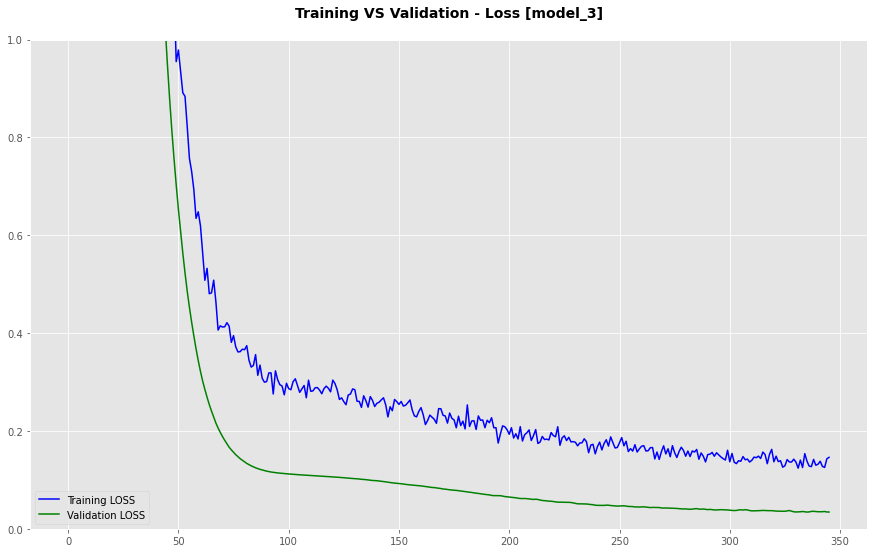

In [61]:
# accuracy = history.history['accuracy']
# val_accuray = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

len(history.epoch)

plt.figure(figsize=(15, 9)) 
plt.title(
    'Training VS Validation - Loss [model_3]\n', 
    {'fontsize': 14,'fontweight': 'bold'}
)

# plt.plot(range(len(history.epoch)), accuracy, 'r', 
#          label='Training MAE')
# plt.plot(range(len(history.epoch)), val_accuracy, 'orange', 
#          label='Validation MAE')

plt.plot(range(len(history.epoch)), loss, 'b', 
         label='Training LOSS')
plt.plot(range(len(history.epoch)), val_loss, 'g', 
         label='Validation LOSS')

plt.legend(loc='lower left')
plt.gca().set_ylim(0, 1)
plt.grid(True)

plt.show();